# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Read in clustering dataset, note that this one is still missing the aggregated weather data, but this can easily be added in later

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [5]:
df

,Bridge_ID,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21
0,2.12E+13,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]",...,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]"
1,CALHAN-8TH ST.,"[36.0, 97.0, 428, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.3, 97.0, 955, 1949, 2, 11.0, 7.0]","[36.3, 96.9, 955, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]",...,"[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 9.7, 7.3]","[36.3, 97.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 522, 1949, 2, 9.7, 7.3]"
2,CSG-C.80-07.65,"[36.0, 83.9, 417, 1970, 2, 6.6, 6.4]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.3, 76.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 69.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]",...,"[36.3, 62.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 717, 1970, 2, 6.6, 2.9]"
3,CSG-D.04-10.42,"[36.0, 82.0, 1836, 1955, 2, 7.6, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 83.4, 1459, 1955, 2, 7.7, 3.0]","[36.3, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]",...,"[36.3, 72.3, 1295, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 2696, 1955, 2, 7.7, 3.4]"
4,CSG-D.37-15.67,"[36.0, 97.0, 87, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]",...,"[36.3, 98.0, 397, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 99.0, 287, 1984, 2, 12.8, 3.0]","[36.3, 99.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 268, 1984, 2, 12.8, 3.0]"
...

# For the first row of the dataset, plot the sufficiency rating over time

In [6]:
first_row = df.iloc[1]

In [7]:
first_row = first_row.iloc[1:]

In [8]:
first_row

time_0     [36.0, 97.0, 428, 1949, 2, 10.9, 7.3]
time_1     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_2     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_3     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_4     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_5     [36.3, 97.0, 955, 1949, 2, 11.0, 7.0]
time_6     [36.3, 96.9, 955, 1949, 2, 11.0, 7.3]
time_7     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_8     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_9     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_10    [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_11    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_12    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_13    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_14    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_15     [36.3, 97.0, 422, 1949, 2, 9.7, 7.3]
time_16     [36.3, 97.0, 369, 1949, 2, 9.7, 7.3]
time_17     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_18     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_19     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_20     [36.3, 8

In [9]:
import re

non_decimal = re.compile(r'[^\d.]+')

list_of_row_components = []

for i, row in first_row.iteritems():
    current_row_components = row.split(', ')
    current_row_components_replaced = []
    
#     print(current_row_components)
    for idx, component in enumerate(current_row_components):
    #     print(first_row_components[idx])
        result = non_decimal.sub('', current_row_components[idx])
        current_row_components_replaced.append(float(result))
        
#     print(current_row_components_replaced)
    list_of_row_components.append(current_row_components_replaced)

In [10]:
first_row = df.iloc[1]

In [11]:
list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [12]:
first_row = first_row.iloc[1:]

In [13]:
sufficiency_rating_list = []

for row_component in list_of_row_components:
    sufficiency_rating_list.append(row_component[1])

In [14]:
sufficiency_rating_list

[97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0]

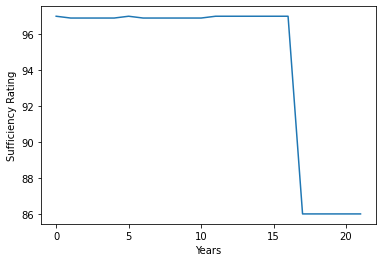

In [15]:
import matplotlib.pyplot as plt

plt.plot(sufficiency_rating_list)
plt.ylabel('Sufficiency Rating')
plt.xlabel('Years')
plt.show()


# Example of first training example

In [16]:
import pandas as pd

var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
varout = []

for element in list_of_row_components:
#     print(element)
    var1.append(element[0])
    var2.append(element[2])
    var3.append(element[3])
    var4.append(element[4])
    var5.append(element[5])
    var6.append(element[6])
    varout.append(element[1])
    
dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

df_temp = pd.DataFrame(dict_temp)

In [17]:
df_temp

,var1,var2,var3,var4,var5,var6,varout
0,36.0,428.0,1949.0,2.0,10.9,7.3,97.0
1,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
2,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
3,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
4,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
5,36.3,955.0,1949.0,2.0,11.0,7.0,97.0
6,36.3,955.0,1949.0,2.0,11.0,7.3,96.9
7,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
8,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
9,36.3,983.0,1949.0,2.0,11.0,7.3,96.9


# Convert each rows into it's own dataframe representing an individual time series example

In [18]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []

for i in range(1, 524):
    
    list_of_row_components = []
    
    current_row = df.iloc[i]
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    varout = []

    for element in list_of_row_components:

        var1.append(element[0])
        var2.append(element[2])
        var3.append(element[3])
        var4.append(element[4])
        var5.append(element[5])
        var6.append(element[6])
        varout.append(element[1])

    dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

    df_temp = pd.DataFrame(dict_temp)

    list_of_training_df.append(df_temp)

In [19]:
len(list_of_training_df)

523

In [20]:
list_of_training_df[7]

,var1,var2,var3,var4,var5,var6,varout
0,36.0,660.0,1970.0,2.0,11.2,2.4,96.9
1,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
2,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
3,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
4,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
5,36.3,950.0,1970.0,2.0,11.1,2.0,97.0
6,36.3,950.0,1970.0,2.0,11.1,2.4,96.9
7,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
8,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
9,36.3,700.0,1970.0,2.0,11.1,2.6,85.9


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

list_of_scaled_training_df = []
encoder = LabelEncoder()

scaler = MinMaxScaler(feature_range=(0, 1))

for training_df in list_of_training_df:
    temp_df = scaler.fit_transform(training_df)
    list_of_scaled_training_df.append(temp_df)

In [22]:
list_of_scaled_training_df[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

# Single example of a time series example for a single bridge

In [23]:
values = list_of_training_df[7].values

In [187]:
n_train_hours = 21
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 1, 6) (21,) (1, 1, 6) (1,)


# Confirm gpu is being used before training

In [25]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [26]:
get_available_gpus()

['/device:GPU:0']

# Build LSTM model

In [49]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     tf.keras.layers.LSTM(100, return_sequences=True),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [50]:
lstm_model.compile(loss='mse', optimizer='adam')

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run with min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.0233 - val_loss: 11.9058
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 14.4345 - val_loss: 17.6573
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.1922 - val_loss: 11.0103
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.2293 - val_loss: 7.8483
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.7649 - val_loss: 3.8782
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.8049 - val_loss: 4.7503
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.4057 - val_loss: 5.5895
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.0426 - val_loss: 3.2458
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.4008 - val_loss: 4.1935
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.1935 - val_loss: 3.9923
EPOCH: 11 OUT OF 1000
(21, 1, 6) 

1/1 - 0s - loss: 0.3854 - val_loss: 0.1026
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3785 - val_loss: 0.0360
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5565 - val_loss: 0.2509
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2449 - val_loss: 0.1360
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5252 - val_loss: 0.3973
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2071 - val_loss: 0.1872
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1999 - val_loss: 0.2475
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1993 - val_loss: 0.2530
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1119 - val_loss: 0.0919
EPOCH: 94 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1038 - val_loss: 0.1593
EPOCH: 95 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1865 - val_

EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1226 - val_loss: 0.1863
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1777 - val_loss: 0.1597
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0579 - val_loss: 0.1319
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3871 - val_loss: 0.2302
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3432 - val_loss: 0.3873
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1979 - val_loss: 0.2004
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2648 - val_loss: 0.3058
EPOCH: 177 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6204 - val_loss: 0.6205
EPOCH: 178 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1216 - val_loss: 0.1386
EPOCH: 179 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1491 - val_loss: 0.0989
EPOCH: 180 OUT OF 10

EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1071 - val_loss: 0.1396
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1925 - val_loss: 0.0706
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1225 - val_loss: 0.0409
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1128 - val_loss: 0.0615
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0660 - val_loss: 0.1260
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2711 - val_loss: 0.3544
EPOCH: 260 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2209 - val_loss: 0.0208
EPOCH: 261 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1248 - val_loss: 0.2318
EPOCH: 262 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1418 - val_loss: 0.0316
EPOCH: 263 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3191 - val_loss: 0.1156
EPOCH: 264 OUT OF 10

EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2631 - val_loss: 0.4563
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0393 - val_loss: 0.0745
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1306 - val_loss: 0.1332
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2959 - val_loss: 0.2848
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0420 - val_loss: 5.5819e-05
EPOCH: 343 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1351 - val_loss: 0.2635
EPOCH: 344 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1179 - val_loss: 0.0823
EPOCH: 345 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0746 - val_loss: 0.1443
EPOCH: 346 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1065 - val_loss: 0.1204
EPOCH: 347 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3256 - val_loss: 0.3384
EPOCH: 348 OUT O

1/1 - 0s - loss: 0.0896 - val_loss: 0.1901
EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0562 - val_loss: 0.0020
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0368 - val_loss: 0.0137
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1116 - val_loss: 0.0466
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1892 - val_loss: 0.0792
EPOCH: 426 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2036 - val_loss: 0.1522
EPOCH: 427 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1717 - val_loss: 0.2007
EPOCH: 428 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1308 - val_loss: 0.0601
EPOCH: 429 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2256 - val_loss: 0.6512
EPOCH: 430 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0526 - val_loss: 0.0032
EPOCH: 431 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0

1/1 - 0s - loss: 0.1984 - val_loss: 0.1968
EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1343 - val_loss: 0.3974
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2410 - val_loss: 0.1630
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2282 - val_loss: 0.4994
EPOCH: 509 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0822 - val_loss: 9.0668e-06
EPOCH: 510 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2427 - val_loss: 0.3463
EPOCH: 511 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0730 - val_loss: 0.0509
EPOCH: 512 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0595 - val_loss: 0.0490
EPOCH: 513 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2282 - val_loss: 0.2117
EPOCH: 514 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1296 - val_loss: 0.1456
EPOCH: 515 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

EPOCH: 589 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2296 - val_loss: 0.2266
EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1358 - val_loss: 0.1586
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3481 - val_loss: 0.5797
EPOCH: 592 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2861 - val_loss: 0.1406
EPOCH: 593 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0536 - val_loss: 0.0455
EPOCH: 594 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1004 - val_loss: 0.0078
EPOCH: 595 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0875 - val_loss: 0.1056
EPOCH: 596 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1030 - val_loss: 0.1105
EPOCH: 597 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1123 - val_loss: 0.1312
EPOCH: 598 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0927 - val_loss: 0.2186
EPOCH: 599 OUT OF 10

1/1 - 0s - loss: 0.2248 - val_loss: 0.2225
EPOCH: 673 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0288 - val_loss: 0.0012
EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3623 - val_loss: 0.1302
EPOCH: 675 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0506 - val_loss: 0.0154
EPOCH: 676 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1534 - val_loss: 0.0618
EPOCH: 677 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0799 - val_loss: 0.2068
EPOCH: 678 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1222 - val_loss: 0.0865
EPOCH: 679 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2223 - val_loss: 0.2188
EPOCH: 680 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2675 - val_loss: 0.2507
EPOCH: 681 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2349 - val_loss: 0.1334
EPOCH: 682 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

1/1 - 0s - loss: 0.0777 - val_loss: 0.1773
EPOCH: 757 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1003 - val_loss: 0.2691
EPOCH: 758 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1211 - val_loss: 0.0141
EPOCH: 759 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1214 - val_loss: 0.4626
EPOCH: 760 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3077 - val_loss: 0.1926
EPOCH: 761 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2333 - val_loss: 0.0031
EPOCH: 762 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1710 - val_loss: 0.1955
EPOCH: 763 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1838 - val_loss: 0.0623
EPOCH: 764 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0940 - val_loss: 0.1032
EPOCH: 765 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1734 - val_loss: 0.6031
EPOCH: 766 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0

1/1 - 0s - loss: 0.0247 - val_loss: 0.0106
EPOCH: 841 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1288 - val_loss: 0.0044
EPOCH: 842 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0608 - val_loss: 0.0201
EPOCH: 843 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2492 - val_loss: 0.1678
EPOCH: 844 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0752 - val_loss: 0.1542
EPOCH: 845 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0534 - val_loss: 0.1730
EPOCH: 846 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2467 - val_loss: 0.1717
EPOCH: 847 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0482 - val_loss: 0.0325
EPOCH: 848 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3929 - val_loss: 0.4528
EPOCH: 849 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2328 - val_loss: 0.2292
EPOCH: 850 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

EPOCH: 925 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2195 - val_loss: 0.2178
EPOCH: 926 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1087 - val_loss: 0.0927
EPOCH: 927 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3825 - val_loss: 0.3733
EPOCH: 928 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0552 - val_loss: 0.0358
EPOCH: 929 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0722 - val_loss: 0.2450
EPOCH: 930 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1320 - val_loss: 0.1286
EPOCH: 931 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0884 - val_loss: 0.2520
EPOCH: 932 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0875 - val_loss: 0.0435
EPOCH: 933 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1234 - val_loss: 0.2149
EPOCH: 934 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0926 - val_loss: 0.0919
EPOCH: 935 OUT OF 10

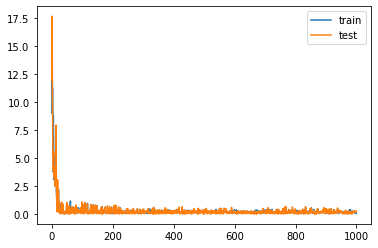

In [58]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_scaled_training_df[rand_int]

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    lstm_model.reset_states()
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [59]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [60]:
rmse

82.92668360875814

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run without min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8495.0312 - val_loss: 8553.6826
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8928.0527 - val_loss: 10193.5762
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3674.9324 - val_loss: 3855.9839
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8629.5596 - val_loss: 9050.4902
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1657.6455 - val_loss: 1638.6844
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9591.2988 - val_loss: 9668.1504
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10045.5059 - val_loss: 10142.7236
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6734.3252 - val_loss: 6727.3950
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4900.4360 - val_loss: 4895.1348
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6966.528

EPOCH: 81 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9143.2881 - val_loss: 9136.7441
EPOCH: 82 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9223.4775 - val_loss: 9217.8252
EPOCH: 83 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8795.9658 - val_loss: 9143.8252
EPOCH: 84 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8613.0078 - val_loss: 8299.5918
EPOCH: 85 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7264.8789 - val_loss: 7670.3140
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5958.3916 - val_loss: 6155.5835
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9344.9512 - val_loss: 9473.7275
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9105.7852 - val_loss: 9100.5820
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5198.7100 - val_loss: 4731.8511
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 63

EPOCH: 160 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8000.0054 - val_loss: 6683.2598
EPOCH: 161 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8830.2480 - val_loss: 8992.6133
EPOCH: 162 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8455.4912 - val_loss: 8428.8652
EPOCH: 163 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4360.7539 - val_loss: 4358.9985
EPOCH: 164 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1327.2744 - val_loss: 334.0136
EPOCH: 165 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5076.2891 - val_loss: 4863.2681
EPOCH: 166 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8596.6934 - val_loss: 8627.7227
EPOCH: 167 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8627.7227 - val_loss: 8623.3096
EPOCH: 168 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5263.8442 - val_loss: 5346.5361
EPOCH: 169 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s -

EPOCH: 239 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5707.6675 - val_loss: 5693.8926
EPOCH: 240 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7797.0708 - val_loss: 8214.7646
EPOCH: 241 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7910.3306 - val_loss: 7961.1616
EPOCH: 242 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7132.7271 - val_loss: 5897.4399
EPOCH: 243 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7382.2856 - val_loss: 7880.5537
EPOCH: 244 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 727.7664 - val_loss: 721.0027
EPOCH: 245 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3341.0227 - val_loss: 2574.3113
EPOCH: 246 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5890.8271 - val_loss: 5932.1714
EPOCH: 247 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8230.6816 - val_loss: 8220.6143
EPOCH: 248 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

EPOCH: 318 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5122.1646 - val_loss: 5119.3550
EPOCH: 319 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3582.8113 - val_loss: 3750.2986
EPOCH: 320 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7278.8125 - val_loss: 7167.3110
EPOCH: 321 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 650.9158 - val_loss: 650.0309
EPOCH: 322 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7975.7686 - val_loss: 8006.0459
EPOCH: 323 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4223.8325 - val_loss: 4838.2153
EPOCH: 324 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2399.0403 - val_loss: 2397.6343
EPOCH: 325 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4766.7778 - val_loss: 4622.6802
EPOCH: 326 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2154.5369 - val_loss: 2152.7109
EPOCH: 327 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

EPOCH: 397 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7424.1323 - val_loss: 7328.2935
EPOCH: 398 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7285.9229 - val_loss: 6875.5933
EPOCH: 399 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7330.9492 - val_loss: 7399.8623
EPOCH: 400 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5298.5156 - val_loss: 5355.1938
EPOCH: 401 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3947.4006 - val_loss: 3888.5276
EPOCH: 402 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 869.2807 - val_loss: 890.5027
EPOCH: 403 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7540.2856 - val_loss: 7650.2178
EPOCH: 404 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4402.9502 - val_loss: 3125.2417
EPOCH: 405 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5860.1509 - val_loss: 6087.8911
EPOCH: 406 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

EPOCH: 476 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7369.4346 - val_loss: 7361.2427
EPOCH: 477 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4595.2290 - val_loss: 4490.8618
EPOCH: 478 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6608.6992 - val_loss: 6361.4805
EPOCH: 479 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3991.1980 - val_loss: 3024.6995
EPOCH: 480 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2070.3132 - val_loss: 3228.5908
EPOCH: 481 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3685.2693 - val_loss: 3682.9236
EPOCH: 482 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7398.5479 - val_loss: 7477.7510
EPOCH: 483 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6706.1069 - val_loss: 6697.1470
EPOCH: 484 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7205.7856 - val_loss: 7363.1909
EPOCH: 485 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 555 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4437.8682 - val_loss: 4553.4272
EPOCH: 556 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4697.3394 - val_loss: 2304.1074
EPOCH: 557 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3248.1067 - val_loss: 2359.3333
EPOCH: 558 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4691.5068 - val_loss: 4636.2788
EPOCH: 559 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 770.5377 - val_loss: 72.2145
EPOCH: 560 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2198.9807 - val_loss: 1053.4971
EPOCH: 561 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5651.0908 - val_loss: 5333.7661
EPOCH: 562 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2335.2124 - val_loss: 2507.6689
EPOCH: 563 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3940.5684 - val_loss: 1811.1407
EPOCH: 564 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - l

EPOCH: 634 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6685.3677 - val_loss: 6607.7627
EPOCH: 635 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3046.8989 - val_loss: 3122.1206
EPOCH: 636 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2655.3748 - val_loss: 2505.1318
EPOCH: 637 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6346.3696 - val_loss: 6514.7124
EPOCH: 638 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5345.9180 - val_loss: 3964.9934
EPOCH: 639 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2121.2949 - val_loss: 2322.8147
EPOCH: 640 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4857.9883 - val_loss: 6373.7524
EPOCH: 641 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3011.5391 - val_loss: 3009.5557
EPOCH: 642 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6787.1123 - val_loss: 6926.3965
EPOCH: 643 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 713 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6527.2588 - val_loss: 6635.5142
EPOCH: 714 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1237.3203 - val_loss: 1236.1277
EPOCH: 715 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5401.6924 - val_loss: 5000.2329
EPOCH: 716 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2264.5952 - val_loss: 2883.3950
EPOCH: 717 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1337.2159 - val_loss: 1393.4470
EPOCH: 718 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1362.6373 - val_loss: 1361.1338
EPOCH: 719 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6310.4302 - val_loss: 6505.6572
EPOCH: 720 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5341.0288 - val_loss: 5585.9922
EPOCH: 721 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6500.5635 - val_loss: 6403.8213
EPOCH: 722 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 792 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6110.1465 - val_loss: 6421.7715
EPOCH: 793 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4266.0742 - val_loss: 4286.0454
EPOCH: 794 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6190.5635 - val_loss: 6259.4761
EPOCH: 795 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5837.7100 - val_loss: 5857.5283
EPOCH: 796 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4381.0078 - val_loss: 4424.5850
EPOCH: 797 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3850.4971 - val_loss: 3863.7371
EPOCH: 798 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2625.3533 - val_loss: 2622.8821
EPOCH: 799 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5195.4067 - val_loss: 5222.6733
EPOCH: 800 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2649.1167 - val_loss: 2195.0967
EPOCH: 801 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 871 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3816.3567 - val_loss: 3814.2017
EPOCH: 872 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1232.1277 - val_loss: 1230.8710
EPOCH: 873 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1815.7195 - val_loss: 628.3199
EPOCH: 874 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3997.5222 - val_loss: 3995.6545
EPOCH: 875 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4733.7578 - val_loss: 3843.5212
EPOCH: 876 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1114.6978 - val_loss: 1100.8433
EPOCH: 877 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5757.3569 - val_loss: 6068.2070
EPOCH: 878 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3937.6086 - val_loss: 3988.2131
EPOCH: 879 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 976.9135 - val_loss: 97.2477
EPOCH: 880 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - lo

EPOCH: 950 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4765.6396 - val_loss: 5876.5093
EPOCH: 951 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4661.3306 - val_loss: 3351.7087
EPOCH: 952 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5422.8999 - val_loss: 5420.1641
EPOCH: 953 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5879.6216 - val_loss: 5952.0239
EPOCH: 954 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4201.2319 - val_loss: 3670.3752
EPOCH: 955 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1552.1851 - val_loss: 1393.5769
EPOCH: 956 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4567.7925 - val_loss: 3698.4775
EPOCH: 957 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5772.6167 - val_loss: 5689.5298
EPOCH: 958 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 713.9528 - val_loss: 676.5945
EPOCH: 959 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

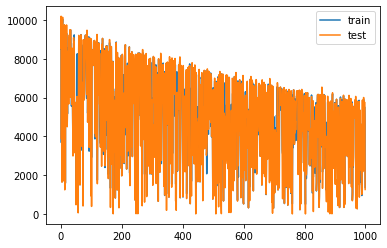

In [54]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [55]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [56]:
rmse

59.564423514983666

In [57]:
predicted

[20.612076,
 20.612076,
 24.199451,
 22.291847,
 21.819641,
 20.612076,
 20.612076,
 24.199451,
 24.199451,
 24.199451,
 20.612076,
 20.612076,
 24.199451,
 21.819641,
 21.819641,
 24.199451,
 24.199451,
 24.199451,
 23.264862,
 21.819641,
 24.199451,
 24.199451,
 24.199451,
 24.199451,
 22.291847,
 24.199451,
 24.199451,
 23.264862,
 20.612076,
 20.612076,
 24.199451,
 22.291847,
 22.291847,
 24.199451,
 24.199451,
 22.291847,
 22.291847,
 22.291847,
 20.612076,
 22.291847,
 20.612076,
 20.612076,
 24.199451,
 24.199451,
 24.199451,
 21.819641,
 21.819641,
 20.612076,
 24.199451,
 24.199451,
 20.612076,
 22.291847,
 24.199451,
 24.199451,
 20.612076,
 23.264862,
 24.199451,
 21.819569,
 24.199451,
 21.819641,
 24.199451,
 22.291847,
 21.819641,
 24.199451,
 24.199451,
 21.819641,
 20.612076,
 24.199451,
 22.291847,
 20.612076,
 24.199451,
 24.199451,
 21.819641,
 23.264862,
 21.819641,
 24.199451,
 22.291847,
 24.199451,
 21.819641,
 24.199451,
 20.612076,
 22.291847,
 24.199451,
 20.

In [291]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [577]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
#     list_of_row_components = []
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
#     print(bridge_id)
#     print(current_row)
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []
        
#         current_row_components_replaced.append(bridge_id)

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
#             print(result)
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# bridge_ids = []
# var1 = []
# var2 = []
# var3 = []
# var4 = []
# var5 = []
# var6 = []
# varout = []

# for element in list_of_row_components:

#     bridge_ids.append(element[0])
#     var1.append(float(element[1]))
#     var2.append(float(element[2]))
#     var3.append(float(element[3]))
#     var4.append(float(element[5]))
#     var5.append(float(element[6]))
#     var6.append(float(element[7]))
#     varout.append(float(element[2]))

# # dict_temp = {'bridge_id':bridge_ids, 'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}
# dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

# df_temp = pd.DataFrame(dict_temp)

# list_of_training_df.append(df_temp)

In [578]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float( list_of_row_components[idx][i])

In [579]:
import numpy as np

# list_of_row_components = np.array(list_of_row_components)

list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [580]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


In [581]:
len(list_of_row_components)

11506

In [623]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Build LSTM model

In [624]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     tf.keras.layers.LSTM(100, return_sequences=True),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [625]:
lstm_model.compile(loss='mse', optimizer='adam')

In [626]:
list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

In [627]:
len(list_of_examples)

522

In [628]:
list_of_examples[0]

array([[  36. ,    7.3,  428. , 1949. ,    2. ,   10.9,   97. ],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36.3,    7. ,  955. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  955. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  

In [629]:
for idx, example in enumerate(list_of_examples):
#     print('here')
    print(list_of_examples[idx][21][6])
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

86.0
55.7
50.2
100.0
70.9
71.7
98.9
65.9
79.5
97.6
49.5
66.2
19.9
99.0
81.3
90.6
58.8
98.0
89.5
95.4
84.0
100.0
78.9
83.4
95.8
98.0
99.9
75.3
82.0
62.7
81.7
71.2
84.0
99.0
40.6
98.9
97.7
73.0
69.4
74.0
61.9
43.5
98.9
51.2
95.6
92.0
91.9
47.8
83.4
97.8
99.9
96.7
47.9
79.7
95.8
96.8
87.6
92.0
63.9
97.4
71.4
92.0
99.9
98.9
78.4
84.2
91.7
55.2
95.3
34.0
93.4
63.1
95.1
39.5
97.3
63.9
87.3
71.4
87.6
58.3
71.6
97.0
63.7
78.7
23.3
79.2
97.9
89.6
89.6
78.0
11.0
96.0
93.1
94.1
94.8
63.2
97.3
90.0
96.7
80.9
97.0
90.7
94.9
95.4
76.4
83.5
75.8
95.8
87.0
91.1
63.8
96.9
44.5
81.5
96.9
81.8
49.4
81.3
96.8
96.7
95.0
97.9
57.3
56.1
93.1
88.1
97.0
59.4
93.8
90.5
84.0
69.1
66.3
98.8
99.8
99.0
98.7
97.0
85.9
98.3
99.2
62.2
73.5
99.9
95.8
97.2
84.1
100.0
74.8
77.4
100.0
88.9
100.0
100.0
98.1
98.3
92.8
96.9
78.9
55.3
54.3
98.1
91.2
95.1
67.1
98.0
97.0
100.0
99.6
74.8
98.9
100.0
100.0
79.3
87.2
96.4
74.8
99.1
99.3
91.6
99.8
58.5
92.9
55.3
100.0
88.9
47.1
81.4
100.0
100.0
96.9
95.4
99.9
99.9
99.8
100.0
96.8
92

In [630]:
list_of_examples.shape

(522, 22, 7)

In [631]:
list_of_examples.astype(np.float)

array([[[3.6000e+01, 7.3000e+00, 4.2800e+02, ..., 2.0000e+00,
         1.0900e+01, 9.7000e+01],
        [3.6000e+01, 7.3000e+00, 9.5500e+02, ..., 2.0000e+00,
         1.0900e+01, 9.6900e+01],
        [3.6000e+01, 7.3000e+00, 9.5500e+02, ..., 2.0000e+00,
         1.0900e+01, 9.6900e+01],
        ...,
        [3.6300e+01, 7.3000e+00, 3.6900e+02, ..., 2.0000e+00,
         9.7000e+00, 8.6000e+01],
        [3.6300e+01, 7.3000e+00, 3.6900e+02, ..., 2.0000e+00,
         9.7000e+00, 8.6000e+01],
        [8.6000e+01, 8.6000e+01, 8.6000e+01, ..., 8.6000e+01,
         8.6000e+01, 8.6000e+01]],

       [[3.6000e+01, 6.4000e+00, 4.1700e+02, ..., 2.0000e+00,
         6.6000e+00, 8.3900e+01],
        [3.6000e+01, 3.0000e+00, 3.5100e+02, ..., 2.0000e+00,
         6.6000e+00, 7.0900e+01],
        [3.6000e+01, 3.0000e+00, 3.5100e+02, ..., 2.0000e+00,
         6.6000e+00, 7.0900e+01],
        ...,
        [3.2700e+01, 2.9000e+00, 6.2300e+02, ..., 2.0000e+00,
         6.6000e+00, 5.5700e+01],
        [3.2

In [632]:
list_of_examples[0][21]

array([86., 86., 86., 86., 86., 86., 86.])

In [633]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [634]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


In [635]:
train_y[0]

86.0

In [636]:
train_X[0]

array([[   7.3,  428. , 1949. ,    2. ,   10.9,   97. ],
       [   7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [   7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [   7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [   7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [   7. ,  955. , 1949. ,    2. ,   11. ,   97. ],
       [   7.3,  955. , 1949. ,    2. ,   11. ,   96.9],
       [   7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [   7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [   7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [   7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [   7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [   7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [   7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [   7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [   7.3,  422. , 1949. ,    2. ,    9.7,   97. ],
       [   7.3,  369. , 1949. ,    2. ,    9.7,   97. ],
       [   7.3,  369. , 1949. ,

In [637]:
train_X[0][0].shape

(6,)

# Build LSTM model

In [644]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])),
#     tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(25, return_sequences=True),
    tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [645]:
lstm_model.compile(loss='mse', optimizer='adam')

In [647]:
history = lstm_model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/1000
5/5 - 0s - loss: 776.6276 - val_loss: 466.1786
Epoch 2/1000
5/5 - 0s - loss: 666.5452 - val_loss: 401.8412
Epoch 3/1000
5/5 - 0s - loss: 586.9301 - val_loss: 378.2432
Epoch 4/1000
5/5 - 0s - loss: 513.1487 - val_loss: 360.8959
Epoch 5/1000
5/5 - 0s - loss: 485.1230 - val_loss: 355.5756
Epoch 6/1000
5/5 - 0s - loss: 446.4182 - val_loss: 354.9412
Epoch 7/1000
5/5 - 0s - loss: 422.7479 - val_loss: 354.8810
Epoch 8/1000
5/5 - 0s - loss: 410.6182 - val_loss: 356.2977
Epoch 9/1000
5/5 - 0s - loss: 409.8529 - val_loss: 358.4290
Epoch 10/1000
5/5 - 0s - loss: 400.3551 - val_loss: 359.8032
Epoch 11/1000
5/5 - 0s - loss: 401.0134 - val_loss: 362.1145
Epoch 12/1000
5/5 - 0s - loss: 393.8828 - val_loss: 363.2304
Epoch 13/1000
5/5 - 0s - loss: 390.7591 - val_loss: 362.8516
Epoch 14/1000
5/5 - 0s - loss: 387.3022 - val_loss: 363.5946
Epoch 15/1000
5/5 - 0s - loss: 394.2895 - val_loss: 364.6305
Epoch 16/1000
5/5 - 0s - loss: 392.8170 - val_loss: 364.7746
Epoch 17/1000
5/5 - 0s - loss: 38

Epoch 135/1000
5/5 - 0s - loss: 337.7613 - val_loss: 357.5776
Epoch 136/1000
5/5 - 0s - loss: 339.5834 - val_loss: 357.1800
Epoch 137/1000
5/5 - 0s - loss: 338.4344 - val_loss: 356.2032
Epoch 138/1000
5/5 - 0s - loss: 337.0596 - val_loss: 355.2157
Epoch 139/1000
5/5 - 0s - loss: 333.3559 - val_loss: 353.8389
Epoch 140/1000
5/5 - 0s - loss: 320.6289 - val_loss: 339.2695
Epoch 141/1000
5/5 - 0s - loss: 323.3517 - val_loss: 356.5707
Epoch 142/1000
5/5 - 0s - loss: 331.8399 - val_loss: 353.6920
Epoch 143/1000
5/5 - 0s - loss: 344.8238 - val_loss: 358.0179
Epoch 144/1000
5/5 - 0s - loss: 340.4207 - val_loss: 311.3771
Epoch 145/1000
5/5 - 0s - loss: 307.0847 - val_loss: 352.0023
Epoch 146/1000
5/5 - 0s - loss: 330.8617 - val_loss: 347.6089
Epoch 147/1000
5/5 - 0s - loss: 324.8808 - val_loss: 301.9772
Epoch 148/1000
5/5 - 0s - loss: 311.7111 - val_loss: 365.2801
Epoch 149/1000
5/5 - 0s - loss: 319.1666 - val_loss: 357.1793
Epoch 150/1000
5/5 - 0s - loss: 317.0511 - val_loss: 353.0449
Epoch 15

5/5 - 0s - loss: 246.2022 - val_loss: 295.7081
Epoch 268/1000
5/5 - 0s - loss: 241.4649 - val_loss: 223.4706
Epoch 269/1000
5/5 - 0s - loss: 220.4735 - val_loss: 277.1010
Epoch 270/1000
5/5 - 0s - loss: 244.0447 - val_loss: 263.9562
Epoch 271/1000
5/5 - 0s - loss: 233.0784 - val_loss: 262.1953
Epoch 272/1000
5/5 - 0s - loss: 234.0263 - val_loss: 380.1194
Epoch 273/1000
5/5 - 0s - loss: 255.2796 - val_loss: 385.6829
Epoch 274/1000
5/5 - 0s - loss: 255.6257 - val_loss: 381.4283
Epoch 275/1000
5/5 - 0s - loss: 258.3795 - val_loss: 363.3306
Epoch 276/1000
5/5 - 0s - loss: 260.9924 - val_loss: 336.4650
Epoch 277/1000
5/5 - 0s - loss: 248.4417 - val_loss: 336.4759
Epoch 278/1000
5/5 - 0s - loss: 246.6142 - val_loss: 333.0085
Epoch 279/1000
5/5 - 0s - loss: 251.0774 - val_loss: 346.1597
Epoch 280/1000
5/5 - 0s - loss: 252.9276 - val_loss: 346.7333
Epoch 281/1000
5/5 - 0s - loss: 242.6037 - val_loss: 332.3050
Epoch 282/1000
5/5 - 0s - loss: 243.1306 - val_loss: 318.9273
Epoch 283/1000
5/5 - 0s

Epoch 400/1000
5/5 - 0s - loss: 244.5842 - val_loss: 352.5726
Epoch 401/1000
5/5 - 0s - loss: 241.4844 - val_loss: 350.2851
Epoch 402/1000
5/5 - 0s - loss: 237.1295 - val_loss: 346.9987
Epoch 403/1000
5/5 - 0s - loss: 236.6300 - val_loss: 341.6294
Epoch 404/1000
5/5 - 0s - loss: 243.4535 - val_loss: 349.2514
Epoch 405/1000
5/5 - 0s - loss: 235.8768 - val_loss: 346.2806
Epoch 406/1000
5/5 - 0s - loss: 239.2074 - val_loss: 348.9733
Epoch 407/1000
5/5 - 0s - loss: 222.2729 - val_loss: 348.1174
Epoch 408/1000
5/5 - 0s - loss: 235.8785 - val_loss: 348.5461
Epoch 409/1000
5/5 - 0s - loss: 236.3966 - val_loss: 354.1634
Epoch 410/1000
5/5 - 0s - loss: 229.1569 - val_loss: 347.0077
Epoch 411/1000
5/5 - 0s - loss: 231.6001 - val_loss: 351.1565
Epoch 412/1000
5/5 - 0s - loss: 227.6830 - val_loss: 355.4644
Epoch 413/1000
5/5 - 0s - loss: 228.9398 - val_loss: 354.4055
Epoch 414/1000
5/5 - 0s - loss: 231.5406 - val_loss: 351.8067
Epoch 415/1000
5/5 - 0s - loss: 240.9812 - val_loss: 337.0905
Epoch 41

5/5 - 0s - loss: 189.7436 - val_loss: 295.4947
Epoch 533/1000
5/5 - 0s - loss: 189.8540 - val_loss: 332.9811
Epoch 534/1000
5/5 - 0s - loss: 197.0186 - val_loss: 352.8944
Epoch 535/1000
5/5 - 0s - loss: 202.0098 - val_loss: 349.7079
Epoch 536/1000
5/5 - 0s - loss: 196.4103 - val_loss: 343.4403
Epoch 537/1000
5/5 - 0s - loss: 197.7135 - val_loss: 341.9809
Epoch 538/1000
5/5 - 0s - loss: 193.3255 - val_loss: 343.4661
Epoch 539/1000
5/5 - 0s - loss: 195.6401 - val_loss: 340.4627
Epoch 540/1000
5/5 - 0s - loss: 198.1973 - val_loss: 325.4696
Epoch 541/1000
5/5 - 0s - loss: 194.9546 - val_loss: 325.5616
Epoch 542/1000
5/5 - 0s - loss: 196.3789 - val_loss: 316.7280
Epoch 543/1000
5/5 - 0s - loss: 203.5005 - val_loss: 305.7335
Epoch 544/1000
5/5 - 0s - loss: 187.4406 - val_loss: 286.6931
Epoch 545/1000
5/5 - 0s - loss: 190.0900 - val_loss: 304.8276
Epoch 546/1000
5/5 - 0s - loss: 193.0308 - val_loss: 292.7053
Epoch 547/1000
5/5 - 0s - loss: 193.1032 - val_loss: 281.5536
Epoch 548/1000
5/5 - 0s

Epoch 665/1000
5/5 - 0s - loss: 174.9231 - val_loss: 249.4161
Epoch 666/1000
5/5 - 0s - loss: 178.3364 - val_loss: 417.4099
Epoch 667/1000
5/5 - 0s - loss: 201.1174 - val_loss: 258.7542
Epoch 668/1000
5/5 - 0s - loss: 190.7473 - val_loss: 228.3467
Epoch 669/1000
5/5 - 0s - loss: 178.2442 - val_loss: 273.5468
Epoch 670/1000
5/5 - 0s - loss: 183.3168 - val_loss: 294.7043
Epoch 671/1000
5/5 - 0s - loss: 180.3708 - val_loss: 332.2860
Epoch 672/1000
5/5 - 0s - loss: 187.0030 - val_loss: 330.7284
Epoch 673/1000
5/5 - 0s - loss: 190.8019 - val_loss: 292.4797
Epoch 674/1000
5/5 - 0s - loss: 183.8093 - val_loss: 334.4319
Epoch 675/1000
5/5 - 0s - loss: 197.9344 - val_loss: 349.0012
Epoch 676/1000
5/5 - 0s - loss: 185.7332 - val_loss: 347.4632
Epoch 677/1000
5/5 - 0s - loss: 189.0674 - val_loss: 334.7187
Epoch 678/1000
5/5 - 0s - loss: 189.5473 - val_loss: 325.4329
Epoch 679/1000
5/5 - 0s - loss: 191.2974 - val_loss: 293.9455
Epoch 680/1000
5/5 - 0s - loss: 180.6863 - val_loss: 356.7705
Epoch 68

5/5 - 0s - loss: 192.5202 - val_loss: 280.3287
Epoch 798/1000
5/5 - 0s - loss: 189.6722 - val_loss: 286.6276
Epoch 799/1000
5/5 - 0s - loss: 183.2129 - val_loss: 289.6028
Epoch 800/1000
5/5 - 0s - loss: 194.6889 - val_loss: 280.1107
Epoch 801/1000
5/5 - 0s - loss: 190.4210 - val_loss: 280.8503
Epoch 802/1000
5/5 - 0s - loss: 184.6098 - val_loss: 320.4891
Epoch 803/1000
5/5 - 0s - loss: 190.0430 - val_loss: 327.2531
Epoch 804/1000
5/5 - 0s - loss: 204.5674 - val_loss: 328.6202
Epoch 805/1000
5/5 - 0s - loss: 198.9901 - val_loss: 330.0345
Epoch 806/1000
5/5 - 0s - loss: 205.0609 - val_loss: 328.4703
Epoch 807/1000
5/5 - 0s - loss: 199.8700 - val_loss: 327.7911
Epoch 808/1000
5/5 - 0s - loss: 201.0185 - val_loss: 322.4509
Epoch 809/1000
5/5 - 0s - loss: 197.0941 - val_loss: 319.9766
Epoch 810/1000
5/5 - 0s - loss: 195.8734 - val_loss: 315.6710
Epoch 811/1000
5/5 - 0s - loss: 189.7114 - val_loss: 305.6325
Epoch 812/1000
5/5 - 0s - loss: 189.4731 - val_loss: 289.5267
Epoch 813/1000
5/5 - 0s

Epoch 930/1000
5/5 - 0s - loss: 170.5481 - val_loss: 264.3365
Epoch 931/1000
5/5 - 0s - loss: 174.3754 - val_loss: 262.7047
Epoch 932/1000
5/5 - 0s - loss: 184.1473 - val_loss: 238.7224
Epoch 933/1000
5/5 - 0s - loss: 201.3770 - val_loss: 518.2440
Epoch 934/1000
5/5 - 0s - loss: 224.7626 - val_loss: 429.9721
Epoch 935/1000
5/5 - 0s - loss: 203.7688 - val_loss: 312.9963
Epoch 936/1000
5/5 - 0s - loss: 212.5721 - val_loss: 255.2094
Epoch 937/1000
5/5 - 0s - loss: 182.8021 - val_loss: 267.7822
Epoch 938/1000
5/5 - 0s - loss: 199.0935 - val_loss: 264.2211
Epoch 939/1000
5/5 - 0s - loss: 191.4490 - val_loss: 257.2821
Epoch 940/1000
5/5 - 0s - loss: 182.6696 - val_loss: 241.6533
Epoch 941/1000
5/5 - 0s - loss: 174.8995 - val_loss: 309.5170
Epoch 942/1000
5/5 - 0s - loss: 181.6132 - val_loss: 252.8698
Epoch 943/1000
5/5 - 0s - loss: 173.8867 - val_loss: 321.4227
Epoch 944/1000
5/5 - 0s - loss: 183.8652 - val_loss: 263.8635
Epoch 945/1000
5/5 - 0s - loss: 184.1580 - val_loss: 261.9084
Epoch 94

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [648]:

yhat = lstm_model.predict(test_X)
    
mse = mean_squared_error(test_y, yhat)
rmse = math.sqrt(mse)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
rmse

In [ ]:
predicted